In [1]:
from model import *
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Concatenate, Dropout, AlphaDropout, Lambda, Attention
from tensorflow.keras.layers import GlobalAveragePooling2D, Multiply, Permute, Reshape, Conv1D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

model = load_model("sparse_ResNet64.json", "sparse_ResNet64.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model Loaded


In [2]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8, 8, 17)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 8, 8, 64)     9856        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 8, 8, 64)     36928       conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 8, 8, 64)     256         conv2d_1[0][0]                   
______________________________________________________________________________________________

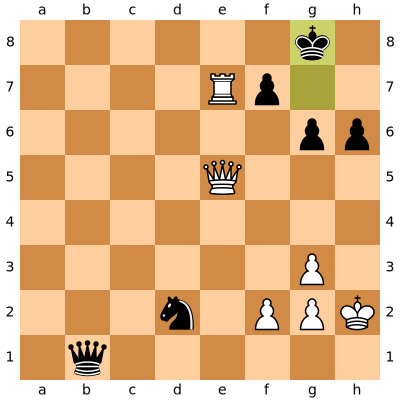

Evaluation:  1.3550002945548143
a1b1(0): 796
	g7h7(1569): 255
		e7f7(1510): 230
			h7g8(1596): 229
				e5e8(1051): 191
				f7g7(1540): 21
	g7f8(1571): 111
		e7e8(1515): 97
	g7g8(1572): 430
		e7e8(1515): 409
			g8h7(1761): 408
				e5h8(1052): 372



In [ ]:
#Lets play a game against our AI
import chess
import MCTS
from IPython.display import display, clear_output
import env

def human_move(board):
    try:
        move = input("Enter Move: ")
        board.push_san(move)
        return 1
    except:
        return human_move(board)
    
def AI_move(board, model, move_dict):
    policy, values, root, log = MCTS.muMCTS(board, board.turn, model, simulations=800)
    uci_move = env.MOVES[np.argmax(policy)]
    board.push_uci(uci_move)
    return policy, values[np.argmax(policy)], root, log

#Game Loop
board = chess.Board()
white = False
move_dict = env.generate_move_dict()
value = 0.0
root = None
while not board.is_game_over():
    clear_output(wait=True)
    display(board)
    print("Evaluation: ", value)
    print(root)

    if white:
        policy, value, root, log = AI_move(board, model, move_dict)
    else:
        human_move(board)
    
    white = not white

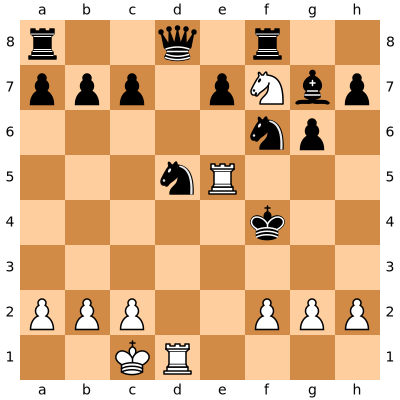

Evaluation:  1.399118351590806
a1b1(0): 783
	d1d4(90): 344
		f6e4(1300): 343
			d4e4(755): 326
	d1d5(92): 30
	f7g5(1528): 16
	f7d8(1542): 319
		f4e5(829): 64
			d8b7(1683): 49
		a8d8(1616): 150
			e5e1(1019): 16
			e5e6(1042): 93
		f8d8(1741): 95
			e5e6(1042): 54
			e5e7(1047): 18



In [4]:
import chess
import MCTS
from IPython.display import display, clear_output
import env

board = chess.Board(fen='r2q1r2/ppp1pNbp/5np1/3nR3/5k2/8/PPP2PPP/2KR4 w - - 7 21')
display(board)
policy, values, root, log = MCTS.muMCTS(board, board.turn, model, simulations=800)
print("Evaluation: ", values[np.argmax(policy)])
print(root)